In [346]:
import pandas as pd
import numpy as np
from pca import pca
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
plt.rcParams["figure.figsize"] = (12,7)
import warnings
warnings.filterwarnings("ignore")

In [347]:
df = pd.read_csv('data/data_interview_test.csv',sep=":")

In [135]:
df['CorrectMatch'] = np.where(df['matched_transaction_id']==df['feature_transaction_id'],1,0)
transaction_ids_with_exact_match = df[df['CorrectMatch']==1].matched_transaction_id.to_list()


m_df =  df[df['matched_transaction_id'].isin(transaction_ids_with_exact_match)]
nm_df = df[~(df['matched_transaction_id'].isin(transaction_ids_with_exact_match))]

Here We have Taken the match of the transaction IDs to create labells for the data in "CorrectMatch" column using 'matched_transaction_id' and 'feature_transaction_id'

DataFrames has been split based on the matched transaction id with the transactions where both CorrectMatch and Incorrect matches are there

In [136]:
feature_columns = ['DateMappingMatch', 'AmountMappingMatch','DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
                   'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate','PredictedAmountMatch', 'PredictedTimeCloseMatch']

We do have 10 Feature columns

In [137]:
transaction_with_unique_features = m_df.groupby(['matched_transaction_id']+feature_columns).agg({'CorrectMatch':'unique'}).reset_index()
transaction_with_unique_features['Count'] = transaction_with_unique_features['CorrectMatch'].apply(lambda x : len(x))

In [138]:
transaction_with_unique_features

,matched_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,CorrectMatch,Count
0,"10,112",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,[0],1
1,"10,112",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[0],1
2,"10,112",0.95,0.0,0.0,1.0,0.0,0.6,0.0,0.0,0.0,0.0,[1],1
3,"10,113",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,[0],1
4,"10,113",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 1]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,"50,407",0.85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,[1],1
3001,"50,407",0.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[0],1
3002,"50,408",0.85,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,[1],1
3003,"50,408",0.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[0],1


In [139]:
duplicated_features = transaction_with_unique_features[transaction_with_unique_features['Count']>1]['matched_transaction_id'].to_list()

In [334]:
distinguished_df = m_df[~(m_df['matched_transaction_id'].isin(duplicated_features))]

During Analysis , I've observed that for a given matched_transaction_id , for the feature_transaction_ids belong to that . There are duplicates in the feature columns which attributes to both Correct and Incorrect matches.

Which essentially tells us that Both Incorrect and Correct Transaction has same feature vector

In [141]:
distinguished_df

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,CorrectMatch
27,"10,002",10000,"10,286","10,286",0.95,0.0,0.0,1.0,0.0,0.8,0.0,0.0,0.0,0.0,1
28,"10,002",10000,"10,286","10,287",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29,"10,002",10000,"10,286","10,288",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
30,"10,002",10000,"10,286","10,289",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31,"10,002",10000,"10,286","10,290",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,"50,226",50000,"50,368","50,074",0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12030,"50,226",50000,"50,368","50,075",0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12031,"50,226",50000,"50,368","50,366",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
12032,"50,226",50000,"50,368","50,367",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


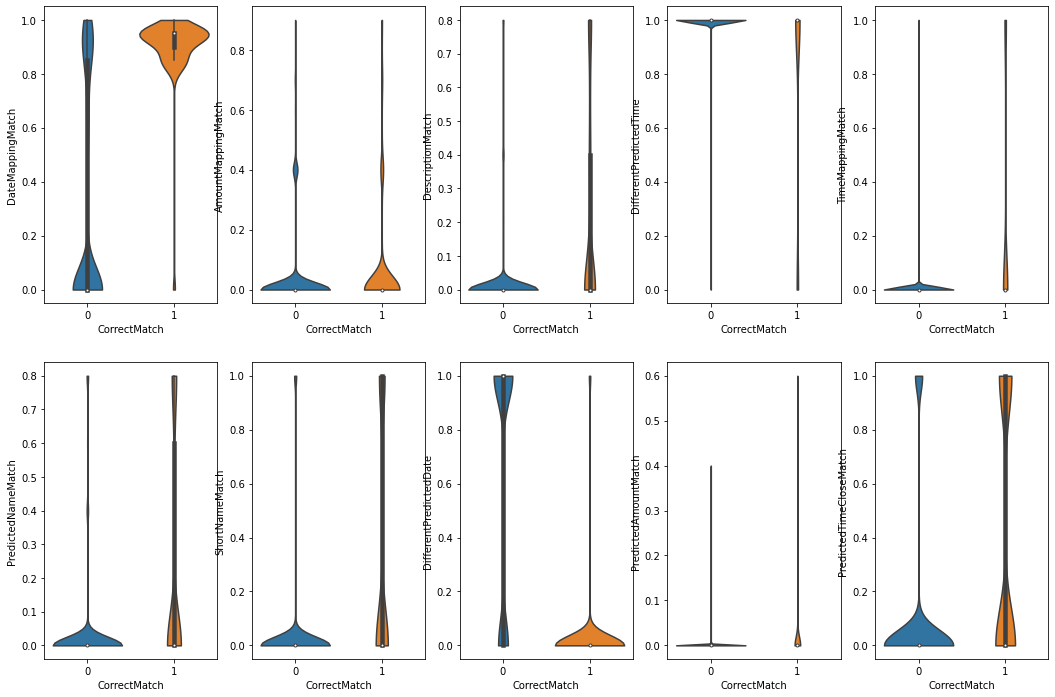

In [142]:
fig, axes = plt.subplots(2, 5,figsize=(18,12))

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(feature_columns):
    sns.violinplot(x="CorrectMatch", y=c,  data=distinguished_df, cut = 0,ax=axe[i])
    
plt.show()

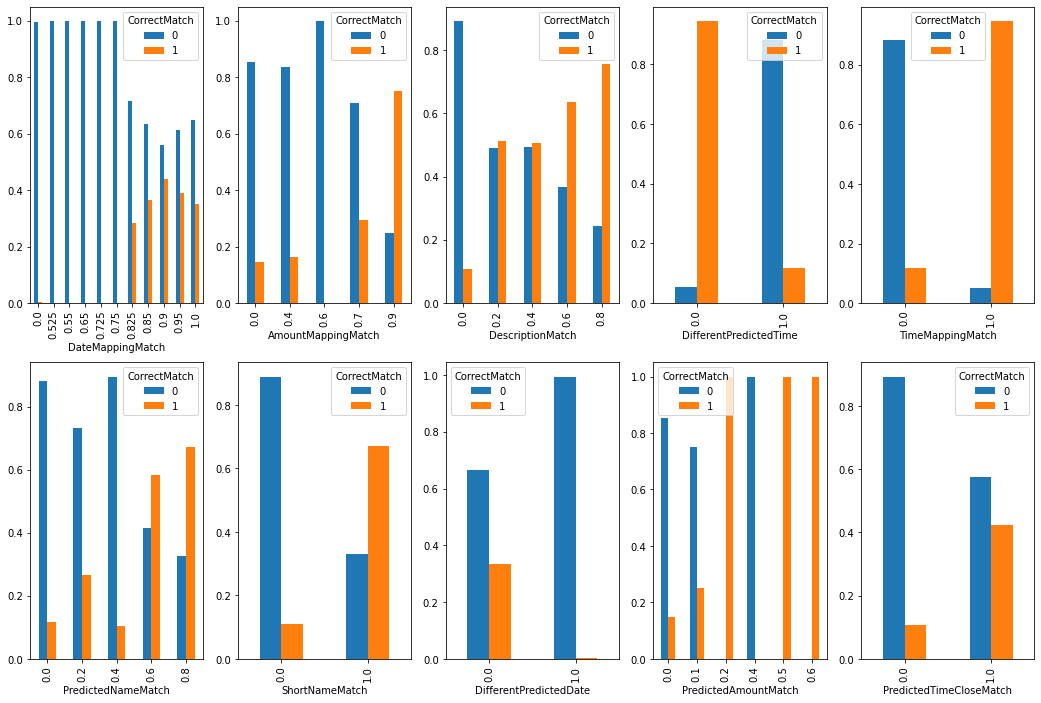

In [143]:
fig, axes = plt.subplots(2, 5,figsize=(18,12))

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(feature_columns):
    pd.crosstab(distinguished_df[c],distinguished_df['CorrectMatch'], normalize='index').plot(kind='bar',ax=axe[i])
    
plt.show()

From the figure  , we can understand that there are some columns which Positively affect the Correct Class [Correctly identified Transaction]  and negatively affect the Correct Class . We can group them like this


- Columns which strongly helps identifying both the classes separately
    - DateMappingMatch - [+]
    - AmountMappingMatch - [+]
    - DifferentPredictedTime - [-]
    - TimeMappingMatch - [+]
    - PredictedAmountMatch - [+]
    
- Columns which helps in identifying (Not so Strong)
    - PredictedNameMatch - [+]
    - DescriptionMatch - [+]
    
- Columns which weakly helps
    - ShortNameMatch - [+]
    - PredictedTimeCloseMatch - [+]
    
I've also assigned polarity to each of the columns . 

- [+] = Value of this variable increases --> Higher chance of being Correct Transaction
- [-] = Value of this variable increases --> Higher chance of being Incorrect Transaction

## Model Building - Primary (linear model)

From the primary inferences , the first model which i would like to try is to take just a linear sum of the positively & negatively affecting variables and create a score

All the analysis will be done on the subset where Features of Correct Transaction and incorrect transaction are not duplicated

In [340]:
p_feat_columns = ['DateMappingMatch','AmountMappingMatch','DescriptionMatch','TimeMappingMatch','PredictedNameMatch','ShortNameMatch','PredictedAmountMatch']
n_feat_columns = ['DifferentPredictedDate','DifferentPredictedTime']
total_cols = p_feat_columns + n_feat_columns

In [341]:
distinguished_df['Linear_Score'] = distinguished_df[p_feat_columns].sum(axis=1) - distinguished_df[n_feat_columns].sum(axis=1)

In [342]:
distinguished_df['Linear_Score']+= distinguished_df['PredictedTimeCloseMatch']*.1

In [343]:
distinguished_df['Max_Score'] = distinguished_df.groupby('matched_transaction_id')['Linear_Score'].transform('max')

In [344]:
distinguished_df[distinguished_df['Max_Score']==distinguished_df['Linear_Score']]['CorrectMatch'].value_counts()

1    558
0     44
Name: CorrectMatch, dtype: int64

In [345]:
558/595

0.9378151260504202

In [202]:
TP = 562
FN = 33
TN = 3335
FP = 32

precision = TP/(TP+FP)
recall = TP/(TP+FN)

f1 = 2 * precision * recall/(precision+recall)

In [208]:
print(precision)
print(recall)
print(f1)

0.9461279461279462
0.9445378151260504
0.945332211942809


In [ ]:
distinguished_df[(distinguished_df['Max_Score']!=distinguished_df['Linear_Score']) & (distinguished_df[''])]

In [201]:
distinguished_df[distinguished_df['Max_Score']==distinguished_df['Linear_Score']]['matched_transaction_id'].value_counts()

31,460    24
31,462    24
31,463    24
30,402    22
30,580    21
          ..
50,252     1
40,114     1
50,207     1
50,307     1
50,180     1
Name: matched_transaction_id, Length: 571, dtype: int64

In [199]:
distinguished_df[distinguished_df['matched_transaction_id']=="50,087"]

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,CorrectMatch,Linear_Score,Max_Score
11629,"50,166",50000,"50,087","50,086",0.00,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.60,0.35
11630,"50,166",50000,"50,087","50,087",0.95,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.35,0.35
11631,"50,166",50000,"50,087","50,088",0.95,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.35,0.35


In [88]:
for column in feature_columns:
    print(distinguished_df[column].value_counts())

0.000    2228
0.950     996
0.850     289
0.650     133
0.900     123
0.825     106
0.550      48
1.000      20
0.750      17
0.525       5
0.725       2
Name: DateMappingMatch, dtype: int64
0.0    3662
0.4     244
0.7      41
0.6      12
0.9       8
Name: AmountMappingMatch, dtype: int64
0.0    3647
0.8     139
0.4      93
0.2      47
0.6      41
Name: DescriptionMatch, dtype: int64
1.0    3817
0.0     150
Name: DifferentPredictedTime, dtype: int64
0.0    3814
1.0     153
Name: TimeMappingMatch, dtype: int64
0.0    3650
0.8     199
0.4      67
0.6      36
0.2      15
Name: PredictedNameMatch, dtype: int64
0.0    3688
1.0     279
Name: ShortNameMatch, dtype: int64
1.0    2228
0.0    1739
Name: DifferentPredictedDate, dtype: int64
0.0    3947
0.1       8
0.5       7
0.6       3
0.2       1
0.4       1
Name: PredictedAmountMatch, dtype: int64
0.0    3425
1.0     542
Name: PredictedTimeCloseMatch, dtype: int64


#### Using Weight of Evidence & Information Value for fine tuning the weights for each variable

In [152]:
distinguished_df['DateMappingMatch'] = np.where(distinguished_df['DateMappingMatch']>=0.5,1,0)
distinguished_df['AmountMappingMatch'] = np.where(distinguished_df['AmountMappingMatch']>=0.1,1,0)
distinguished_df['DescriptionMatch'] = np.where(distinguished_df['DescriptionMatch']>=0.1,1,0)
distinguished_df['PredictedNameMatch'] = np.where(distinguished_df['PredictedNameMatch']>=0.1,1,0)
distinguished_df['PredictedAmountMatch'] = np.where(distinguished_df['PredictedAmountMatch']>=0.05,1,0)

In [153]:
col_and_weights = {}
for col in total_cols:
    feature,target = col,'CorrectMatch'
    df_woe_iv = (pd.crosstab(distinguished_df[feature],distinguished_df[target],
                          normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                               (dfx[1]-dfx[0]))))
    col_and_weights[col] = df_woe_iv['iv'][0]
    print(df_woe_iv)

CorrectMatch             0         1       woe        iv
DateMappingMatch                                        
0                 0.657473  0.018487 -3.571315  2.954709
1                 0.342527  0.981513  1.052745  2.954709
CorrectMatch              0         1       woe        iv
AmountMappingMatch                                       
0                   0.92675  0.902521 -0.026492  0.007565
1                   0.07325  0.097479  0.285755  0.007565
CorrectMatch             0         1       woe       iv
DescriptionMatch                                       
0                 0.965006  0.660504 -0.379131  0.80736
1                 0.034994  0.339496  2.272283  0.80736
CorrectMatch             0         1       woe        iv
TimeMappingMatch                                        
0.0               0.997628  0.756303 -0.276939  1.184648
1.0               0.002372  0.243697  4.631992  1.184648
CorrectMatch               0         1       woe        iv
PredictedNameMatch           

In [154]:
col_and_weights

{'DateMappingMatch': 2.9547093980799635,
 'AmountMappingMatch': 0.007565316540740469,
 'DescriptionMatch': 0.8073600721896744,
 'TimeMappingMatch': 1.184647685250023,
 'PredictedNameMatch': 0.4943488394704465,
 'ShortNameMatch': 0.8017841541260611,
 'PredictedAmountMatch': 0.04693577145510661,
 'DifferentPredictedTime': 1.153386888238355}

In [155]:
col_and_weights['DifferentPredictedTime'] = col_and_weights['DifferentPredictedTime']*-1
# col_and_weights['DifferentPredictedDate'] = col_and_weights['DifferentPredictedDate']*-1

In [156]:
distinguished_df['Score'] = 0
for c,w in col_and_weights.items():
    distinguished_df['Score']+= distinguished_df[c]*w

In [157]:
distinguished_df

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,CorrectMatch,Linear_Score,Max_Score,Score
27,"10,002",10000,"10,286","10,286",1,0,0,1.0,0.0,1,0.0,0.0,0,0.0,1,0.75,0.75,2.295671
28,"10,002",10000,"10,286","10,287",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.05,0.75,1.801323
29,"10,002",10000,"10,286","10,288",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.05,0.75,1.801323
30,"10,002",10000,"10,286","10,289",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.05,0.75,1.801323
31,"10,002",10000,"10,286","10,290",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.05,0.75,1.801323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,"50,226",50000,"50,368","50,074",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.35,-0.05,1.801323
12030,"50,226",50000,"50,368","50,075",1,0,0,1.0,0.0,0,0.0,0.0,0,0.0,0,-0.35,-0.05,1.801323
12031,"50,226",50000,"50,368","50,366",0,0,0,1.0,0.0,0,0.0,1.0,0,1.0,0,-1.00,-0.05,-1.153387
12032,"50,226",50000,"50,368","50,367",0,0,0,1.0,0.0,0,0.0,1.0,0,0.0,0,-1.00,-0.05,-1.153387


In [212]:
distinguished_df['Max_Score_2'] = distinguished_df.groupby('matched_transaction_id')['Indexed_Score'].transform('max')

In [214]:
distinguished_df[distinguished_df['Max_Score_2']==distinguished_df['Indexed_Score']]['CorrectMatch'].value_counts()

1    562
0     37
Name: CorrectMatch, dtype: int64

The use of Weight of Evidence /Information Value doesn't outperform simple linear summation . So we can use use our first method for Further processing

In [210]:
distinguished_df['Indexed_Score'] = distinguished_df['Linear_Score'].apply(lambda x : (x - distinguished_df.Linear_Score.min())/(distinguished_df.Linear_Score.max() - distinguished_df.Linear_Score.min()))

In [211]:
distinguished_df['Indexed_Score']

27       0.312500
28       0.169643
29       0.169643
30       0.169643
31       0.169643
           ...   
12029    0.116071
12030    0.116071
12031    0.017857
12032    0.000000
12033    0.187500
Name: Indexed_Score, Length: 3967, dtype: float64

These generated scores will act as labels for the ML Models which we are going to train

## Model Building - Secondary ( ML Model)

In [216]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
X_train, X_test, y_train, y_test = train_test_split(distinguished_df[total_cols], distinguished_df['Indexed_Score'], test_size = 0.15,random_state=42)

In [269]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0,criterion='mae')

In [270]:
regressor.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', n_estimators=10, random_state=0)

In [271]:
y_pred = regressor.predict(X_test)

In [272]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [277]:
df

,Real Values,Predicted Values,f
10496,0.151786,0.151786,-2.775558e-17
7908,0.000000,0.000000,0.000000e+00
1289,0.071429,0.071429,1.387779e-17
2774,0.116071,0.116071,1.387779e-17
10360,0.129464,0.133929,-4.464286e-03
...,...,...,...
10548,0.544643,0.544643,1.110223e-16
11617,0.000000,0.000000,0.000000e+00
9337,0.000000,0.000000,0.000000e+00
11013,0.000000,0.000000,0.000000e+00


In [296]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 25, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [297]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, 22, 25, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120]}


In [299]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:   56.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 8, 10, 12, 14, 16, 18,
                                                      20, 22, 25, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 22, 34, 46, 58, 71,
                                                         83, 95, 107, 120]},
                   random_state=42, verbose=2)

In [300]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}